In [3]:
import pandas as pd

hause = pd.read_csv('housing-classification-iter-0-2.csv')

In [4]:
hause.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


In [5]:
y = hause.pop("Expensive") # expensive will be the target column

In [6]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: Expensive, Length: 1460, dtype: int64

In [7]:
X=hause

In [9]:
X.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0


In [10]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [11]:
X.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

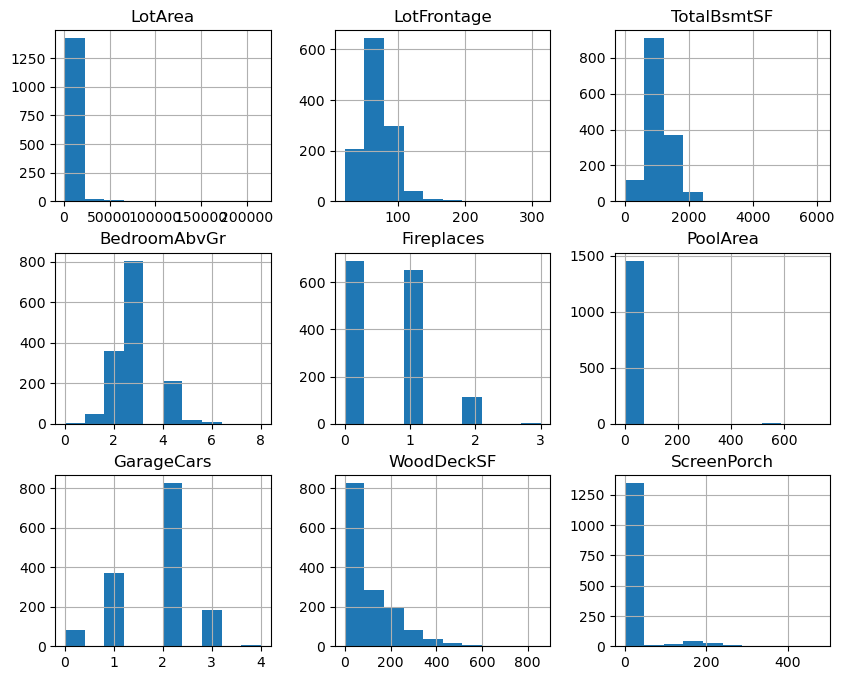

In [12]:
X.hist(figsize=(10, 8));

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9) #dividing data into training 80% and test data  20%

In [14]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1392,7838,68.0,864,3,1,0,1,175,0
426,12800,NaN,1518,2,1,0,2,80,396
321,12099,99.0,1136,4,1,0,3,184,0
425,3378,60.0,651,3,2,0,1,0,0
102,7018,64.0,0,4,0,0,2,0,0


In [17]:
X_train['bed_nr']=X_train['BedroomAbvGr'].apply(lambda x: 1 if x > 3 else 0).astype(int) # if there is 4 or more bedrooms, 1 (expensive), 0 (cheap), datatype int

In [19]:
bedr_room = X_train['bed_nr'] #new vvariable from the series

In [21]:
X_test['bed_nr']=X_test['BedroomAbvGr'].apply(lambda x: 1 if x > 3 else 0).astype(int) # the same criteria for test data
bedr_room_test = X_test['bed_nr']

In [20]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = bedr_room
                                 ) #checking the accuracy opf the train model when I assumed that expensive are hauses having 4 rooms or more

round(train_accuracy, 2)

0.78

In [22]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_test,
                                 y_pred = bedr_room_test
                                 ) # how the model works for test data

round(train_accuracy, 2)

0.75

In [23]:
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X=X_train, y=y_train) 

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [24]:
from sklearn.impute import SimpleImputer # there were missing values, they should be changes, default = mean

In [25]:
my_imputer = SimpleImputer().set_output(transform='pandas') # set_output to have it as a dataframe/series not an arrey

In [26]:
my_imputer.fit(X_train) # I train the model on train data (it calculates the mean from culumns in train dataset)

SimpleImputer()

In [28]:
X_imputed_train = my_imputer.transform(X_train) # missing values are exchanges for a mean value

In [29]:
X_imputed_train.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
bed_nr          0
dtype: int64

In [30]:
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X = X_imputed_train, 
            y = y_train) 

DecisionTreeClassifier()

In [31]:
y_pred_tree_train = my_tree.predict(X_imputed_train)

In [32]:
y_pred_tree_train 

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

1.0

In [46]:
y_test.astype(int)

1068    0
271     0
39      0
775     0
247     0
       ..
1074    0
940     0
100     0
1456    0
1399    0
Name: Expensive, Length: 292, dtype: int32

In [37]:
y_imputed_test = my_imputer.transform(X_test)

In [48]:
y_pred_tree_test = my_tree.predict(y_imputed_test)

In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.8904109589041096

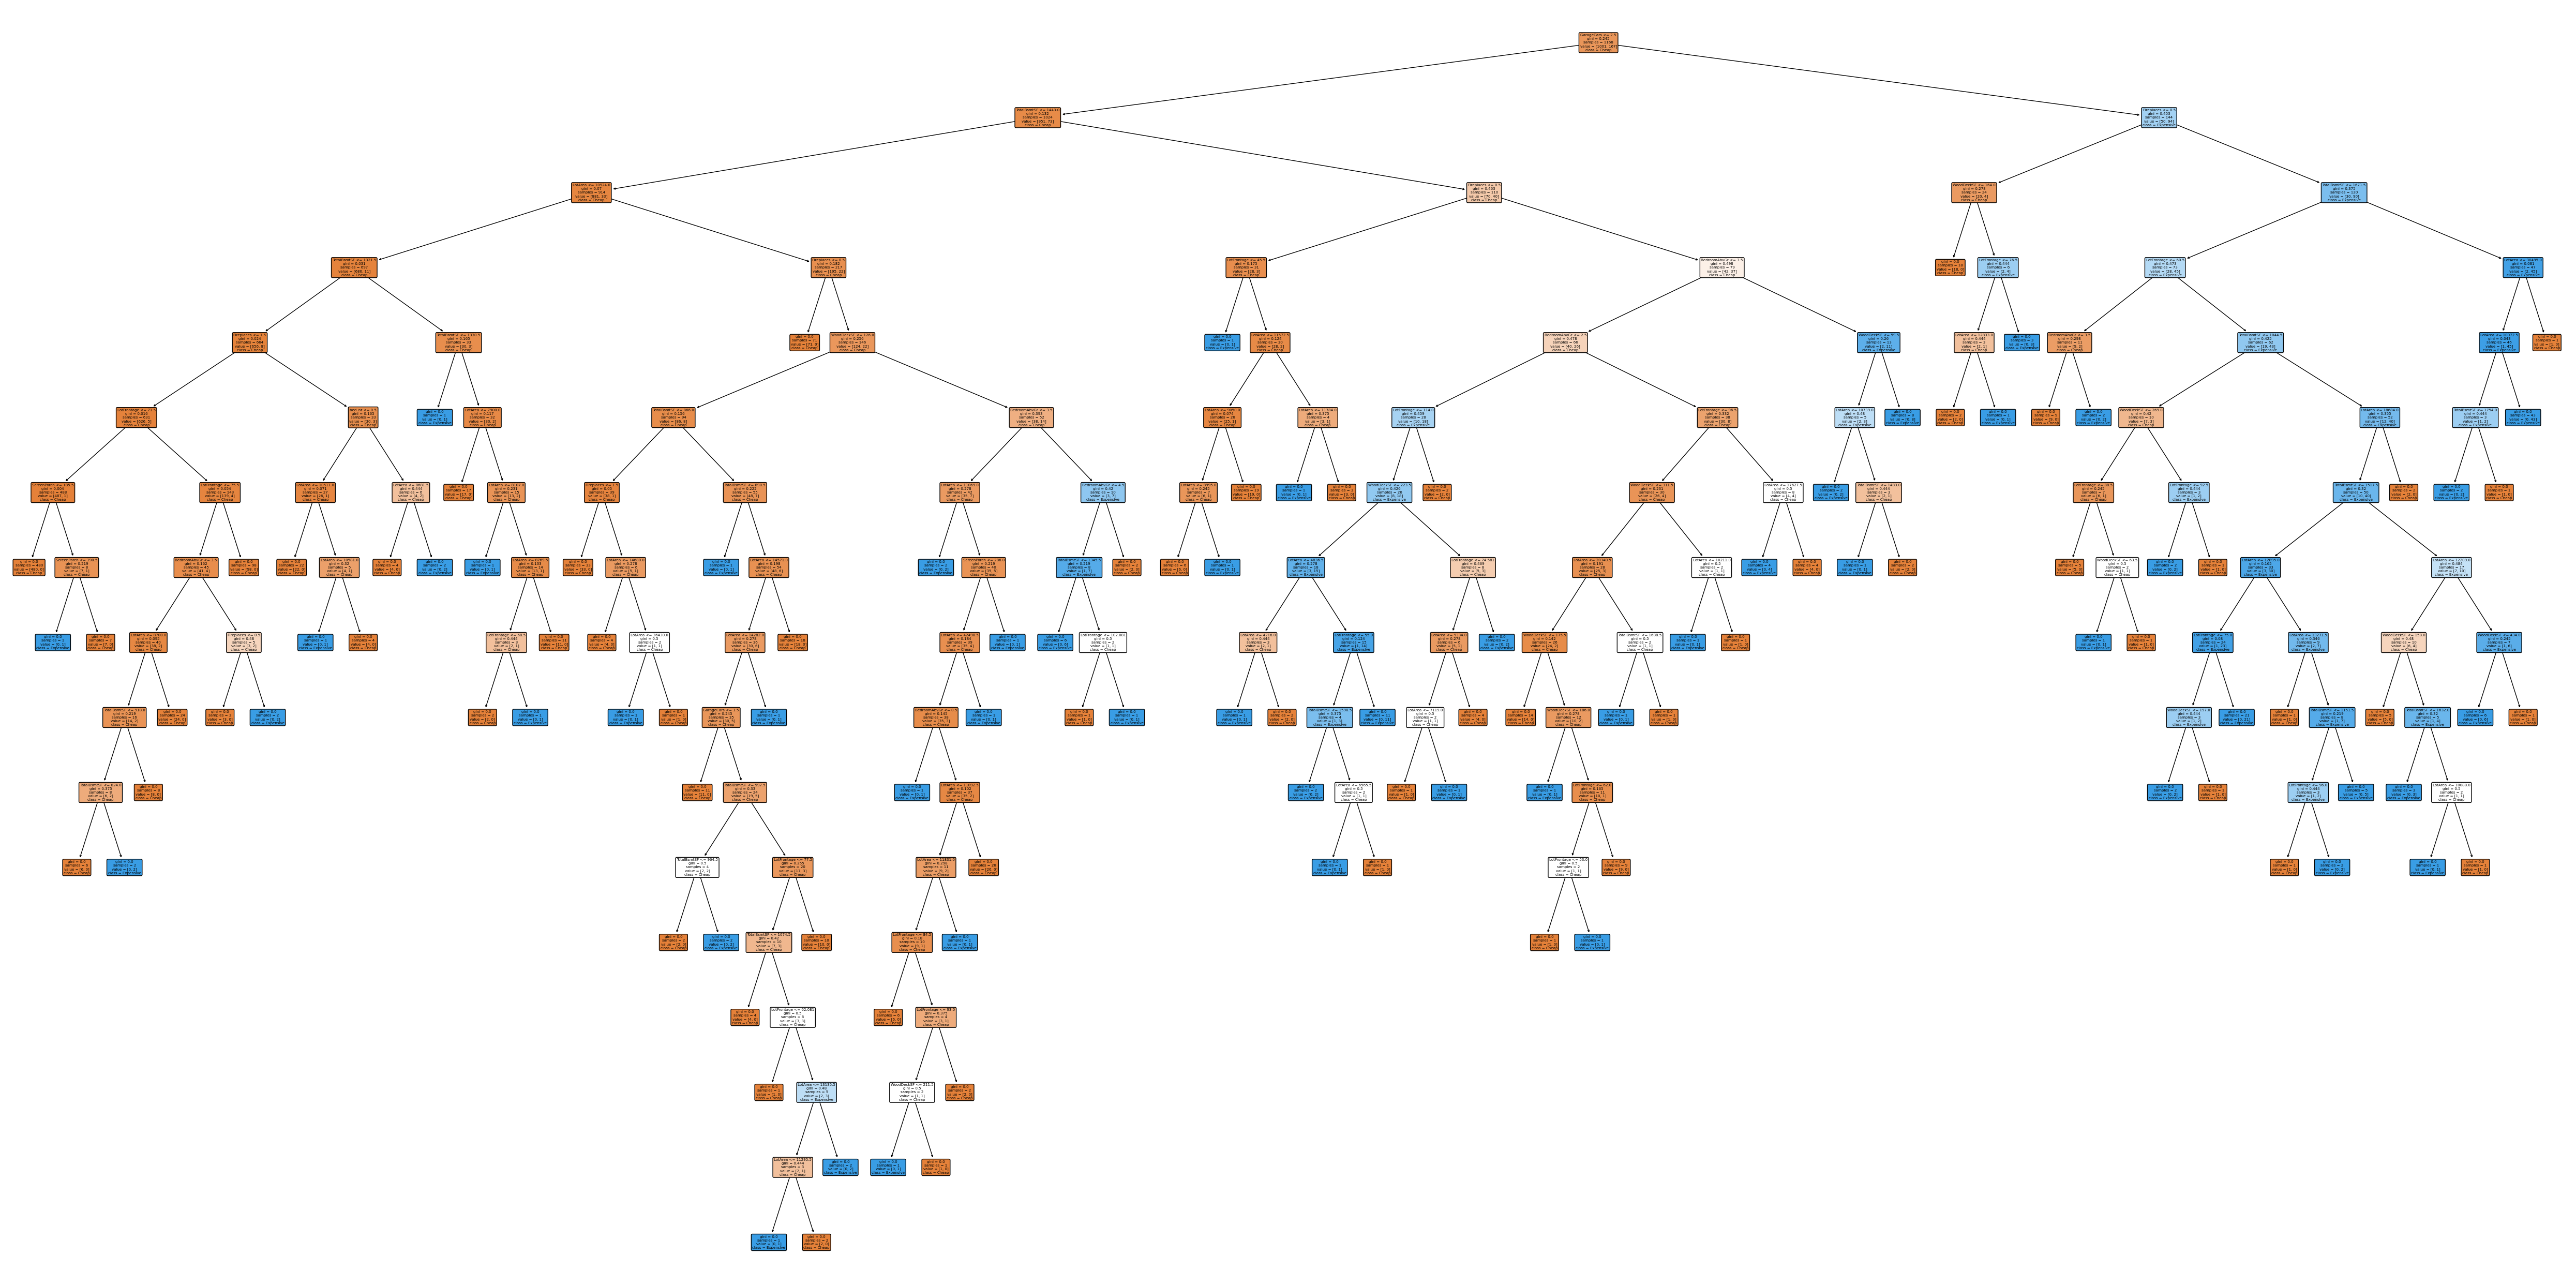

In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Cheap','Expensive'], 
     feature_names=X_imputed_train.columns
     );

In [56]:
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree1 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=6)

# 3. fit the model to the train data
my_tree1.fit(X = X_imputed_train, 
            y = y_train) 

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6)

In [57]:
y_pred_tree_train1 = my_tree1.predict(X_imputed_train)

In [58]:
y_pred_tree_test1=my_tree1.predict(y_imputed_test)

In [59]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train1
              )

0.9340753424657534

In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test1
              )

0.9452054794520548

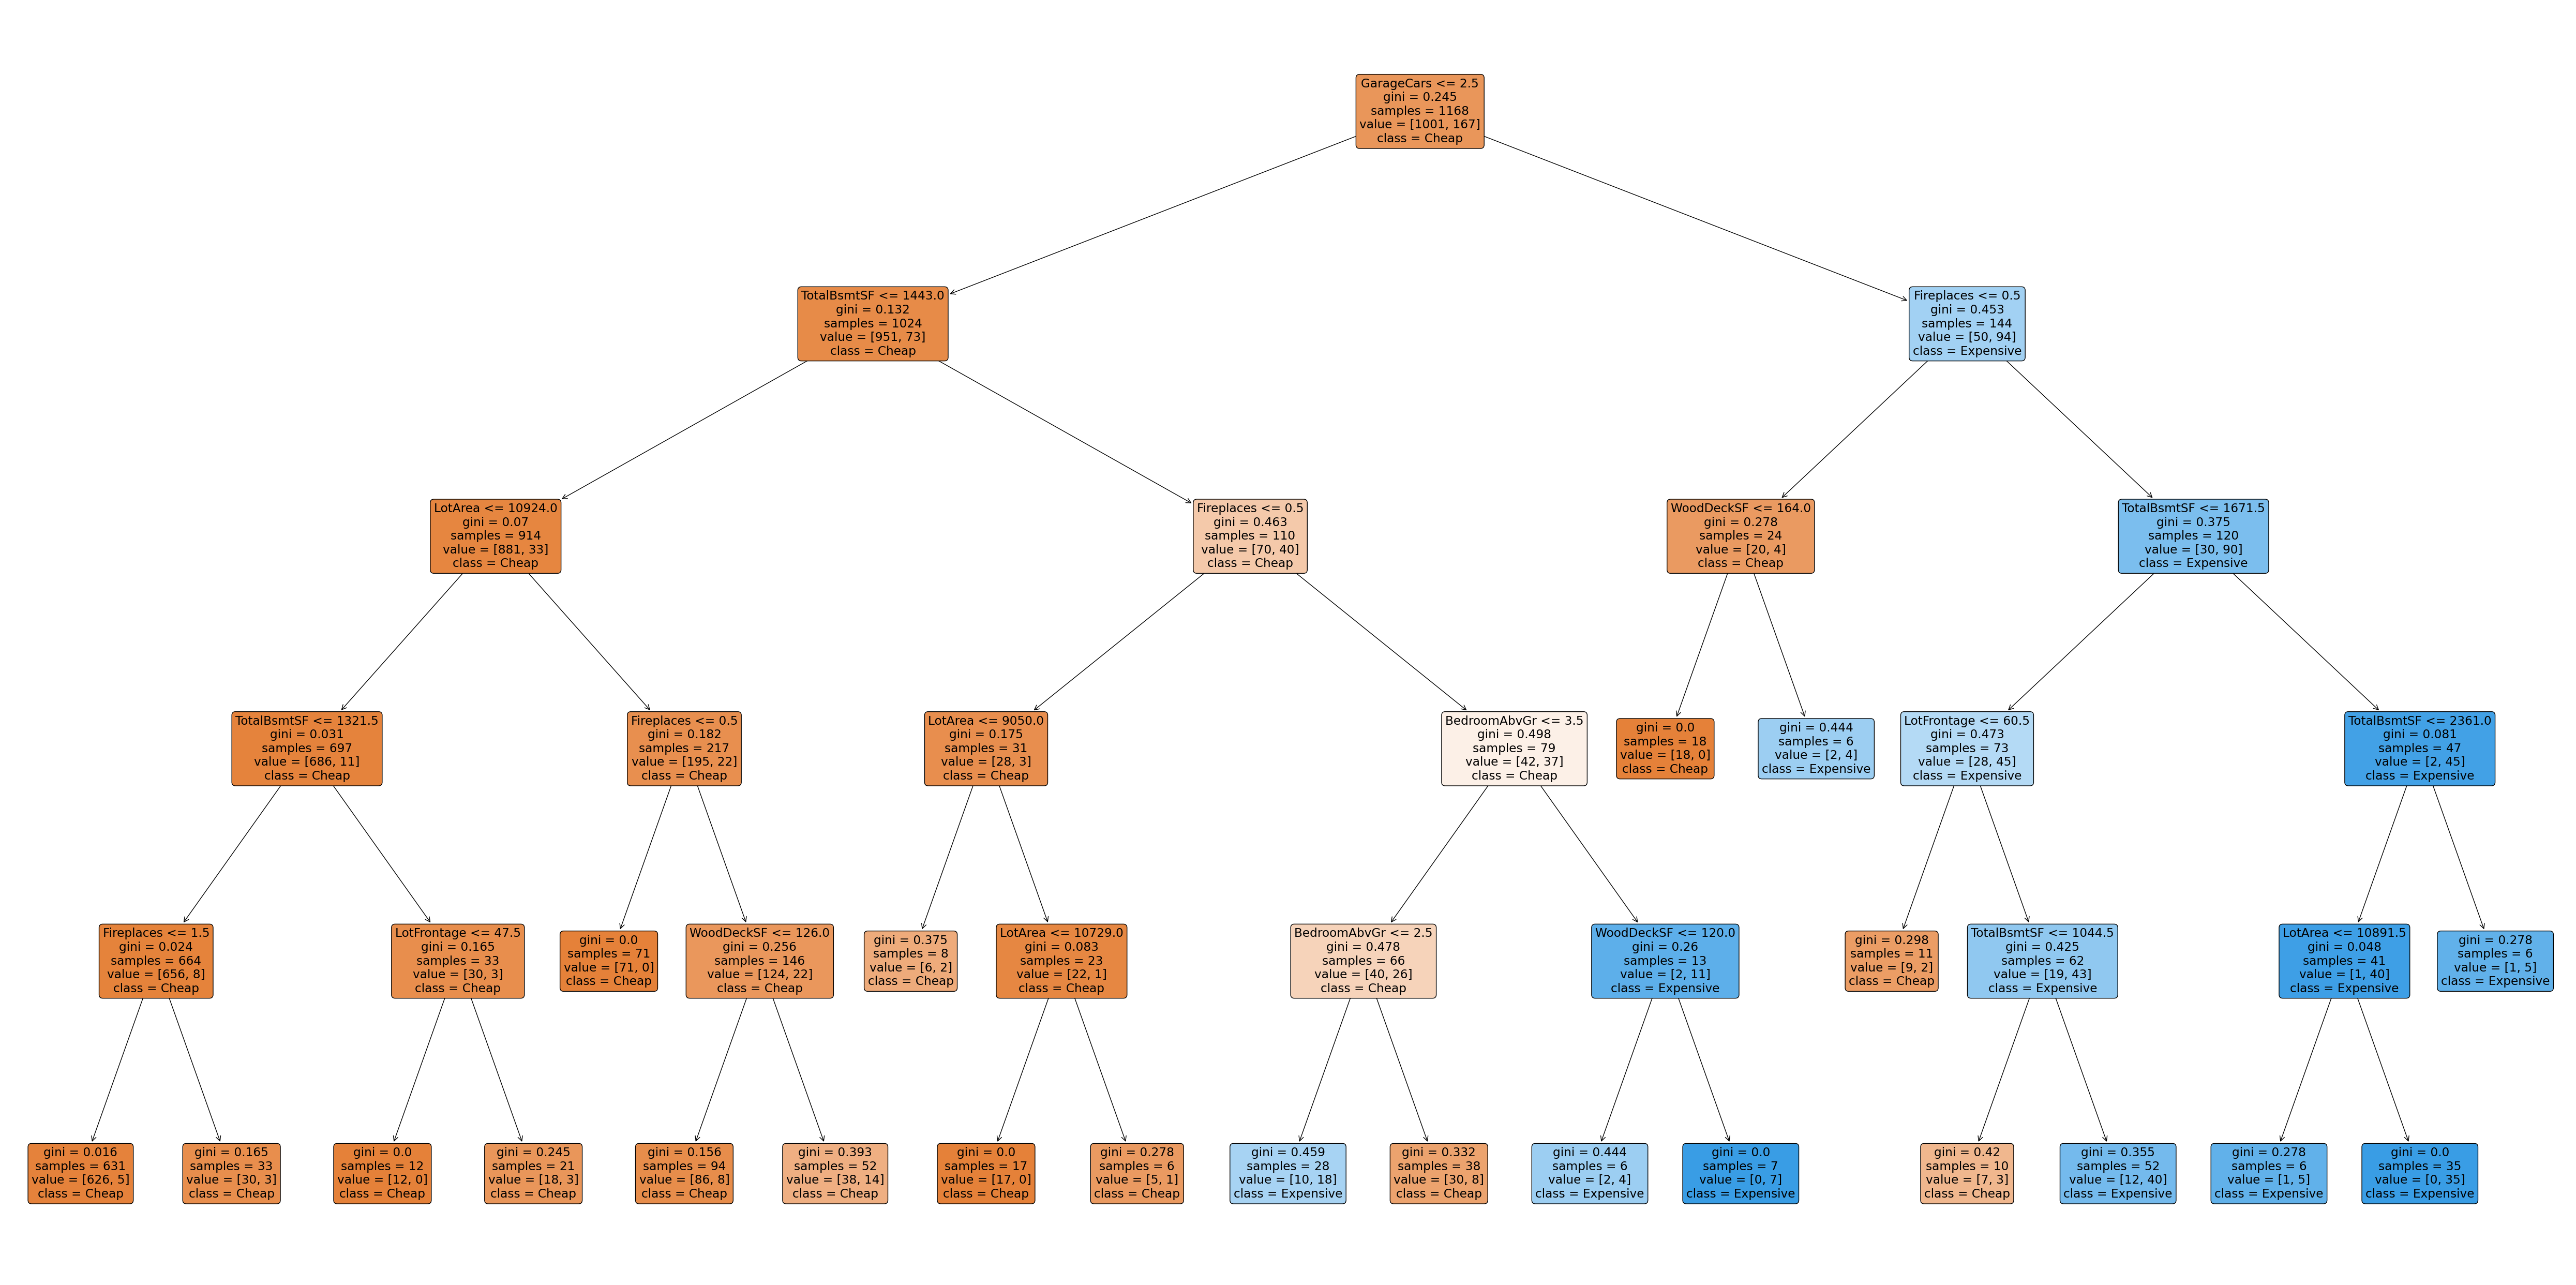

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree1,
     filled=True, 
     rounded=True, 
     class_names=['Cheap','Expensive'], 
     feature_names=X_imputed_train.columns
     );